In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import os
os.getcwd()

'/home/cim/pgt/mfac049/Desktop'

In [3]:
# reading data
data1 = pd.read_sas('DR1IFF_I.xpt')
data2 = pd.read_sas('DR2IFF_I.XPT')

In [4]:
data1 = data1.dropna()
data2 = data2.dropna()

In [5]:
day1 = data1[['DR1_020', 'DR1ICARB']].copy()
day2 = data2[['DR2_020', 'DR2ICARB']].copy()

In [6]:
# combining day1 and day2
day2.columns = ['time', 'CHO']
day1.columns = ['time', 'CHO']
total = pd.concat([day1, day2])
total['time'] = pd.to_datetime(total['time'], unit='s').dt.time

In [7]:
total.shape

(200532, 2)

In [8]:
total.head()

,time,CHO
0,07:30:00,5.397605e-79
1,07:30:00,3.560000e+00
2,07:30:00,2.320000e+00
3,08:00:00,5.397605e-79
4,09:00:00,4.088000e+01


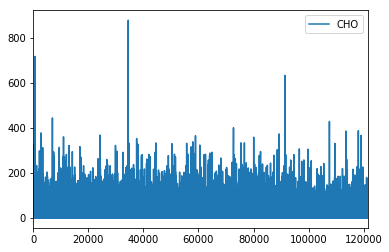

In [9]:
total.plot()
plt.show()

In [10]:
from pandas import Series
ts = pd.Series(total['CHO'].values, index=total['time'])

In [11]:
from statsmodels.tsa.stattools import adfuller
X = ts.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -125.474038
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


time
07:30:00          NaN
07:30:00          NaN
07:30:00     1.960000
08:00:00     1.960000
09:00:00    14.400000
09:00:00    13.710000
11:30:00    14.290000
12:30:00    16.886667
12:30:00    17.193333
12:30:00    17.526667
dtype: float64


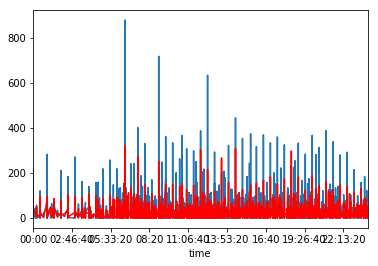

In [12]:
# Tail-rolling average transform
rolling = ts.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
ts.plot()
rolling_mean.plot(color='red')
plt.show()

In [14]:
ts.shape

(200532,)

Test MSE: 688.904


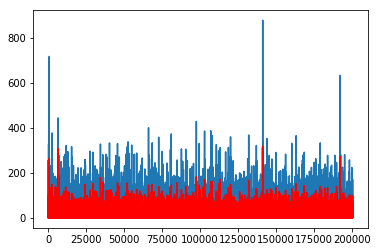

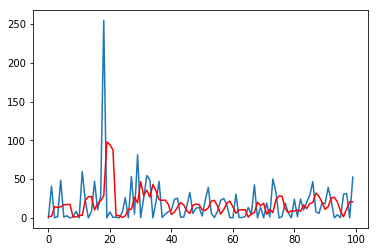

In [17]:
from numpy import mean
from sklearn.metrics import mean_squared_error
X = ts.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()